In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#for mac users to import links
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [6]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:,[3,4]].values #indexing
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [7]:
#import lib for Kmeans
from sklearn.cluster import KMeans

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

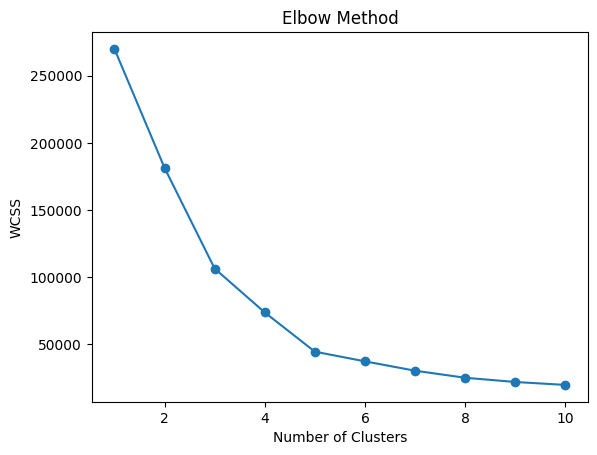

In [10]:
#elbow method
from sklearn.cluster import KMeans
wcss = [] #WCSS - within cluster sum of square
for i in range(1,11): #10 values
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42) #k-means++ - speed up convertions; random_state - pick for a centroid
  kmeans.fit(X) #X = dataset.iloc[:,[3,4]].values
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [11]:
#training the k-means model on the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42) #5 cluster half of 10 standard data
y_means = kmeans.fit_predict(X) #X = dataset.iloc[:,[3,4]].values

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


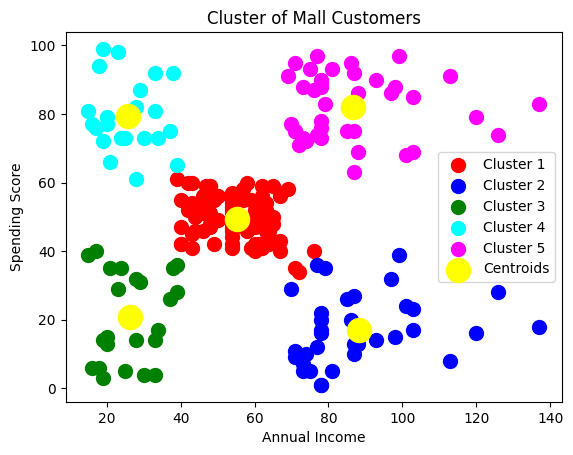

In [16]:
 #using metrics
plt.scatter(X[y_means == 0,0], X[y_means == 0,1], s = 100, c = "red", label = "Cluster 1") #mid ratio, middle income: middle spending score
plt.scatter(X[y_means == 1,0], X[y_means == 1,1], s = 100, c = "blue", label = "Cluster 2") #high income: low spending score
plt.scatter(X[y_means == 2,0], X[y_means == 2,1], s = 100, c = "green", label = "Cluster 3") #low income: low spending score
plt.scatter(X[y_means == 3,0], X[y_means == 3,1], s = 100, c = "cyan", label = "Cluster 4") #low income: high spending score
plt.scatter(X[y_means == 4,0], X[y_means == 4,1], s = 100, c = "magenta", label = "Cluster 5") #high income: low spending score

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s = 300, c = "yellow", label = "Centroids") #pass centroids by 2, 2x2, xy
#s = 300 - means size of centroid

plt.title("Cluster of Mall Customers")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.legend()

plt.show()